<a href="https://colab.research.google.com/github/mhurtado28/Churn-prediction-ML/blob/main/SegundaParte_Preentrega_Contreras_Hurtado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desarrollamos una segunda parte de la preentrega ya que no fue posible continuar en un solo notebook debido a la saturación de la memoria RAM del servicio gratuito de Google Colab. 


Elaborado por: Javier Contreras Aristizabal y Mauricio Hurtado Peláez

# **Modelo y métricas**

En este proyecto se ha determinado que es de clasificación, ya que tenemos los datos cuando un cliente es desertor (1) y cuando no es desertor (2), además consideramos que es de aprendizaje supervisado ya que podemos etiquetar por decirlo así dos posibilidades dentro de la variable churn (deserción).

Para continuar el proyecto, se procede a utilizar diferentes métodos para ver cuál es el que más puede funcionar para dar respuesta a la pregunta problema.

Importamos el dataset que derivó de la etapa anterior

In [ ]:
# Primero cargamos el dataset y el siguiente paso es hacer una lectura del dataframe por medio de una url
from IPython.display import clear_output

In [ ]:
!pip install PyDrive
clear_output()

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
url = 'https://drive.google.com/file/d/1XMX_EFl0V9gvCRZMDZ-GgX9v3k2gnozU/view?usp=share_link'
id = url.split('/')[-2]
drive.CreateFile({"id": id}).GetContentFile("Telecom_df.csv")

In [ ]:
# Importamos las librerías para el desafío:
import pandas as pd
import numpy as np
import os
import sys
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay


In [ ]:
#Función para imprimir métricas. Se usará mas adelante.
def metrica(y_data, predict):
  accuracy = metrics.accuracy_score(y_data, predict)
  print("accuracy: ",accuracy)

  precision_positiva = metrics.precision_score(y_data, predict, pos_label=0)
  print("precision positiva: ",precision_positiva)
  precision_negativa = metrics.precision_score(y_data, predict, pos_label=1)
  print("precision negativa: ",precision_negativa)

  recall_sensibilidad = metrics.recall_score(y_data, predict, pos_label=0)                           
  print("recall sensibilidad: ",recall_sensibilidad)
  recall_especificidad = metrics.recall_score(y_data, predict, pos_label=1)                           
  print("recall especificidad: ",recall_especificidad)

  f1_positivo = metrics.f1_score(y_data, predict, pos_label=0)
  print("f1_positivo: ",f1_positivo) 
  f1_negativo = metrics.f1_score(y_data, predict, pos_label=1)
  print("f1_negativo: ",f1_negativo)

In [ ]:
#Cargamos el Dataset
tel_df = pd.read_csv('Telecom_df.csv', sep=',')
tel_df.head(2)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0,1,0,0,0,0,0,0,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
# Organizamos "X" y "y" para determinar nuestra variable target y matrix, más adelante podrán identificar a que nos referimos:
X = tel_df.drop(['area_N','churn'], 1)       # feature matrix
y = tel_df['churn']               # target feature

<ipython-input-9-a00ba490864b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = tel_df.drop(['area_N','churn'], 1)       # feature matrix


In [ ]:
X

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0000,0.0,0.0,-157.25,...,0,1,0,0,0,0,0,0,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1000,0.0,0.0,532.25,...,0,0,0,0,0,0,0,0,1,1
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0000,0.0,0.0,-4.25,...,0,1,0,0,0,0,0,0,0,1
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0000,0.0,0.0,-1.50,...,0,0,0,0,0,0,1,0,0,1
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0000,0.0,0.0,38.50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,48.1950,355.50,44.990,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,...,0,0,0,0,0,1,0,0,0,1
99962,48.1950,355.50,44.990,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,...,0,1,0,0,0,0,0,0,0,1
99963,48.1950,355.50,44.990,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,...,0,0,0,0,0,0,1,0,0,0
99964,48.1950,355.50,44.990,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y

0        1
1        0
2        1
3        0
4        0
        ..
99961    1
99962    0
99963    0
99964    0
99965    1
Name: churn, Length: 99966, dtype: int64

In [ ]:
RANDOM_STATE = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = RANDOM_STATE)

print("X_train",len(X_train))
print("y_train",len(y_train))
print("X_test",len(X_test))
print("y_test",len(y_test))

X_train 79972
y_train 79972
X_test 19994
y_test 19994


In [ ]:
#Forward selection
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while True: #(len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
best_f = forward_selection(X_train,y_train)


In [ ]:
best_f

['eqpdays',
 'hnd_price',
 'asl_flag_Y',
 'months',
 'marital_U',
 'ovrrev_Mean',
 'mou_Mean',
 'avgmou',
 'ethnic_O',
 'refurb_new_R',
 'ethnic_Z',
 'uniqsubs',
 'roam_Mean',
 'phones',
 'area_NORTHWEST/ROCKY MOUNTAIN AREA',
 'totmrc_Mean',
 'drop_vce_Mean',
 'ethnic_H',
 'peak_vce_Mean',
 'change_mou',
 'change_rev',
 'area_SOUTH FLORIDA AREA',
 'actvsubs',
 'area_DC/MARYLAND/VIRGINIA AREA',
 'area_MIDWEST AREA',
 'area_OHIO AREA',
 'ethnic_C',
 'blck_vce_Mean',
 'threeway_Mean',
 'ethnic_P',
 'creditcd_Y',
 'rev_Mean',
 'ovrmou_Mean',
 'ethnic_N',
 'hnd_webcap_WCMB',
 'ethnic_S',
 'avg3rev',
 'avg6qty',
 'ethnic_X',
 'new_cell_Y',
 'area_NORTH FLORIDA AREA',
 'marital_B',
 'area_DALLAS AREA',
 'area_CENTRAL/SOUTH TEXAS AREA',
 'opk_vce_Mean',
 'area_LOS ANGELES AREA']

In [ ]:
X = X[best_f]  
X          

,eqpdays,hnd_price,asl_flag_Y,months,marital_U,ovrrev_Mean,mou_Mean,avgmou,ethnic_O,refurb_new_R,...,avg3rev,avg6qty,ethnic_X,new_cell_Y,area_NORTH FLORIDA AREA,marital_B,area_DALLAS AREA,area_CENTRAL/SOUTH TEXAS AREA,opk_vce_Mean,area_LOS ANGELES AREA
0,361.0,149.98999,0,61,0,0.0,219.25,83.37,0,0,...,30,136.0,0,0,0,0,0,0,24.000000,0
1,240.0,99.98999,0,56,0,9.1,482.75,479.40,0,0,...,40,275.0,0,0,0,0,0,0,157.000000,0
2,1504.0,29.98999,0,58,0,0.0,10.25,433.98,0,0,...,17,6.0,0,1,0,0,0,0,1.000000,0
3,1812.0,29.98999,0,60,0,0.0,7.50,63.23,0,0,...,38,25.0,0,1,0,0,0,0,3.666667,0
4,434.0,149.98999,0,57,0,0.0,570.50,249.38,0,0,...,55,196.0,0,1,0,0,0,0,90.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,773.0,29.98999,0,25,0,1.0,355.50,452.10,0,0,...,73,159.0,0,0,0,0,0,0,26.666667,1
99962,835.0,29.98999,1,27,0,1.0,355.50,440.25,0,0,...,73,143.0,0,0,0,0,0,0,1.000000,1
99963,433.0,199.98999,0,31,0,1.0,355.50,486.00,0,0,...,61,88.0,0,0,0,1,0,0,0.000000,0
99964,75.0,149.98999,0,25,1,1.0,355.50,975.62,0,0,...,148,433.0,0,0,0,0,0,0,167.333333,0


**2. Algoritmos de clasificación y métricas**

In [ ]:
#Realizamos un split para dividir el dataset el 80% train | 10% validación | 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = RANDOM_STATE)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= RANDOM_STATE)

print("X_train",len(X_train))
print("y_train",len(y_train))
print("X_test",len(X_test))
print("y_test",len(y_test))
print("X_val",len(X_val))
print("y_val",len(y_val))

X_train 79972
y_train 79972
X_test 9997
y_test 9997
X_val 9997
y_val 9997


In [ ]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [ ]:
feature_names = best_f
target_names = ['Nochurn', 'churn']

Árbol de decisión 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


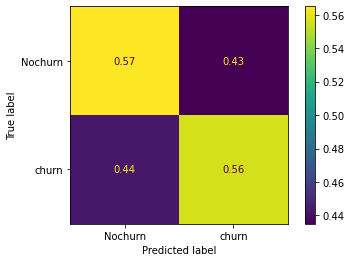

In [ ]:
#DecissionTreeClassifier 
clf = DecisionTreeClassifier(random_state = RANDOM_STATE)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_val)

_ = metrics.plot_confusion_matrix(clf, X_val, y_val, normalize= 'true', display_labels=['Nochurn', 'churn'])

In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred.value_counts()

0    5042
1    4955
dtype: int64

*Decidimos no graficar el árbol completo ya que no se podía observar muy claro, sin embargo, podemos decir que 4,955 clientes desertaran, de acuerdo a este modelo*

In [ ]:
#Métricas de DecissionTreeClassifier 
metrica(y_val, y_pred)

accuracy:  0.5608682604781434
precision positiva:  0.5618802062673542
precision negativa:  0.5598385469223007
recall sensibilidad:  0.5650179497407259
recall especificidad:  0.556692755368252
f1_positivo:  0.5634447096260938
f1_negativo:  0.5582612195612799


In [ ]:
# Todas las métricas:
print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56      5014
           1       0.56      0.56      0.56      4983

    accuracy                           0.56      9997
   macro avg       0.56      0.56      0.56      9997
weighted avg       0.56      0.56      0.56      9997



Regresión Logística

In [ ]:
#LogisticRegression
model = LogisticRegression(max_iter=10000, n_jobs=1) 
# Ajustar modelo
model.fit(X_train, y_train) 
#Predicciones
y_pred2 = model.predict(X_val)

In [ ]:
# Para saber cuántos clientes desertarán relizamos lo siguiente:
prediccion =pd.DataFrame(y_pred2)
prediccion.value_counts()

0    5086
1    4911
dtype: int64

*Acorde al modelo de regresión logistica se puede decir que van a desertar 4,911 clientes en la empresa.*

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


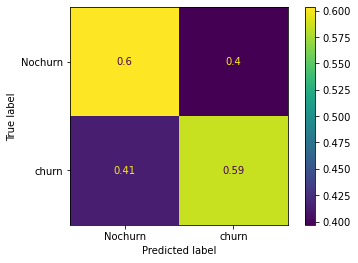

In [ ]:
# Se realiza matriz de confusión
_ = metrics.plot_confusion_matrix(model, X_val, y_val, normalize= 'true', display_labels=['Nochurn', 'churn'])

In [ ]:
#LogisticRegression métricas
metrica(y_val, y_pred2)

accuracy:  0.5946784035210563
precision positiva:  0.5945733385764844
precision negativa:  0.5947872123803706
recall sensibilidad:  0.6031112883925009
recall especificidad:  0.5861930563917319
f1_positivo:  0.5988118811881188
f1_negativo:  0.5904588639579543


In [ ]:
# Todas las métricas:
print(metrics.classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.60      0.60      5014
           1       0.59      0.59      0.59      4983

    accuracy                           0.59      9997
   macro avg       0.59      0.59      0.59      9997
weighted avg       0.59      0.59      0.59      9997



XGBoost

In [ ]:
#XGBoost
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [ ]:
# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds3 = xgb_cl.predict(X_val)


In [ ]:
# Para saber cuántos clientes desertarán relizamos lo siguiente:
dfpreds = pd.DataFrame(preds3)
dfpreds.value_counts()

1    5326
0    4671
dtype: int64

*Acorde al modelo de XGBoost se puede decir que van a desertar 4,671 clientes en la empresa.*

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


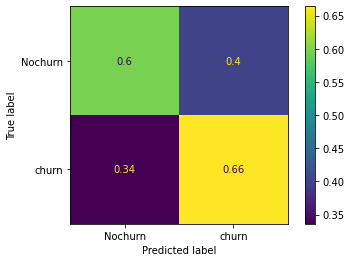

In [ ]:
# Se realiza matriz de confusión
_ = metrics.plot_confusion_matrix(xgb_cl, X_val, y_val, normalize= 'true', display_labels=['Nochurn', 'churn'])

In [ ]:
#Métrica XGBoost
metrica(y_val, preds3)

accuracy:  0.630589176753026
precision positiva:  0.6414044101905374
precision negativa:  0.6211040180247841
recall sensibilidad:  0.5975269246110889
recall especificidad:  0.66385711418824
f1_positivo:  0.6186886938564791
f1_negativo:  0.6417693277718498


In [ ]:
# Todas las metricas:
print(metrics.classification_report(y_val, preds3))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      5014
           1       0.62      0.66      0.64      4983

    accuracy                           0.63      9997
   macro avg       0.63      0.63      0.63      9997
weighted avg       0.63      0.63      0.63      9997



### ***COMPARACIÓN DE METRICAS DE MODELOS***

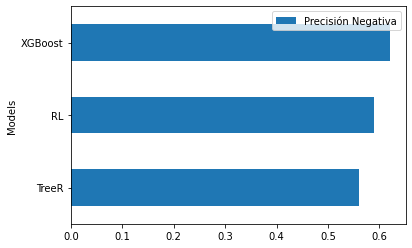

In [ ]:
df = pd.DataFrame({'Models':['TreeR','RL','XGBoost'], 'Precisión Negativa':[0.56, 0.59, 0.62]})
ax = df.plot.barh(x = 'Models', y = 'Precisión Negativa', rot=0)

**3. Métricas correspondientes de acuerdo al problema**

Después de haber hecho los respectivos cálculos de las métricas como se puede observar anteriormente, para el problema en estudio consideramos que las métricas con las que debemos quedarnos es:

1. Precisión Negativa: Tiene mayor relevancia para esta caso dicha métrica, debido a que el objetivo del proyecto es predecir las deserciones de clientes de la compañía, en otras palabras, predecir los negativos (Instancia 1 en el dataset). Algunos autores (1 & 2) coinciden con que esta métrica es la adecuada para este tipo de problemas de deserciones de clientes.

**4. Conclusiones respectivas con base en los resultados obtenidos**

Se puede concluir que después de realizar varios algoritmos, el que mejor resultado tuvo es el de XGBoost, seguido de la regresión logística. El modelo de árbol de decisión tuvo la menor métrica.


*   Precisión negativa XGBoost = 0.62
*   Precisión negativa Regresión Logística = 0.59
*   Precisión negativa Árbol de decisión = 0.56


También podemos decir que gracias a las clases y los desafíos entendimos más en que consiste entrenar, testear y evaluar un modelo. Entendimos la importancia de las etapas previas a la ejecución de los algoritmos para poder tener un alcance más eficiente del modelo. Las métricas que obtuvimos en el modelo, no las consideramos malas, pero somos conscientes que a medida que tengamos más experiencia en el tema podremos alcanzar mejores resultados.

Como resultado final se evidencia que el modelo XGBoost predijo un número relevante de deserciones (4,671 deserciones). Recomendamos a la empresa tomar acciones lo más pronto que se pueda para reducirlos y así pueda mejorar sus utilidades y se siga consolidando en el mercado. Por otro lado, en otros casos se considera una buena estrategia enfocarse en los clientes que no tienden a desertar y mantenerlos a gusto con los servicios de la compañía (2).



**Referencias**

(1) Verne Team. (2020, 20 de octubre). Analizando el abandono de clientes con Python. Artículos de data.https://blogvisionarios.com/articulos-data/analizando-el-abandono-de-clientes-con-python/ 

(2) Aprende Ingeniería. (2022, 27 de octubre). Churn Rate: Resumén y Resolución Del Problemahttps://aprendeingenieria.com/churn-rate-data-science/#.Y1v7jHbMLIU

# **Conclusiones**

Después de desarrollar el respectivo análisis de datos con Python sobre el problema seleccionado, se puede decir que se obtuvieron varios insights que pueden ser de interés para la empresa y así puedan tomar las acciones respectivas para disminuir el porcentaje de deserciones y por consiguiente tener mejores resultados financieros y competitivos. 

Como complemento a lo anterior se puede decir que según los autores de “Leading on the Edge of Chaos” un aumento del 2% en la retención de clientes (o disminución de la rotación) es equivalente a una reducción del 10% en los costos. así que no es de extrañar que las empresas de SaaS (y las que se preocupan por los clientes) presten mucha atención a Churn Analysis. Además, según la Oficina de Asuntos del Consumidor de la Casa Blanca, es de 6 a 7 veces más costoso adquirir un nuevo cliente que retener a uno antiguo. *(Leading on the Edge of Chaos.2022.Análisis de abandono con Machine Learning.Blog sobre las tecnologías más utilizadas del momento como: Big Data, Machine Learning e IA, además de las herramientas de programación y bibliotecas de Python, Tensorflow, Scykit-learn entre muchos otros!.https://sitiobigdata.com/2019/12/24/analisis-de-abandono-con-machine-learning/#)*

A continuación se podrán ver las respectivas recomendaciones:

1. Se pudo visualizar que existen áreas donde existe mayor número de clientes que desertan con relación a los que no, como lo son: Northwest/Rocky Mountain, New England, South Florida, Southwest, Philadelphia, North Florida, California North.
Se recomienda concentrar los esfuerzos en las áreas encontradas para identificar la causa y así tomar acciones que permitan resolver un porcentaje importante de desertores.

2. El límite de gasto de la cuenta varia acorde a la etiqueta, es decir para la etiqueta N existe mayor presencia de deserciones con relación a los clientes que continúan y pasa lo contrario para el caso de la etiqueta Y. Por tal razón se recomienda a la empresa revisar detenidamente el límite de gasto de la cuenta para los casos que etiquetaron como N, esto les permitiría mejorar este comportamiento.

3. Destacamos variables las cuales tienen un comportamiento similar: mou_Mean (Promedio de minutos de uso al mes), comp_vce_Mean (Promedio de llamadas de voz completadas), peak_vce_Mean (Número promedio de llamadas de voz pico entrantes y salientes), avg6mou (Minutos de uso mensual promedio en los últimos seis meses), avg3mou (Promedio de minutos de uso mensual en los últimos tres meses), totmrc_Mean (Cuota recurrente mensual total promedio). Es decir, a medida que va aumentando el valor, disminuye su frecuencia. Es importante que revise la empresa para descartar, si los servicios brindados para clientes que requieren de un mayor consumo prefieren no hacer ese gasto con la compañía por alguna razón.

4. Se puedo observar que a medida que aumenta el promedio (num) de llamadas de voz bloqueadas (fallidas), también se incrementa el ingreso mensual promedio (importe de la tarifa) durante los últimos tres meses, para la mayoría de los casos.

5. Se puede decir que entre más número de días permanezca un cliente con los servicios de la empresa, existe una mayor probabilidad que deserte. Se recomienda que Telecom haga un seguimiento oportuno a aquellos servicios a lo largo del tiempo.

6. Se puede decir que es valioso lo que puede resultar al extraer datos de APIs para futuros proyectos como científicos de datos. Sin embargo, es poca la información que pudimos encontrar relacionada a nuestro dataset, es por esto que se obtuvo datos de varias APIs como práctica. 

Respuestas a las preguntas e hipótesis iniciales:
*texto en cursiva*
**Hipótesis:**

*No tenemos evidencia suficiente para concluir que la media de deserciones de clientes de la empresa de Telecom no es representativa. o "tenemos evidencia suficiente para concluir que la media de deserciones de clientes es representativa con un 49% de deserciones"*


**Preguntas:** 

¿Cuáles son las dos principales áreas con menor número de clientes?

*r. El área de TENNESSEE con 2737 clientes y el área de PHILADELPHIA con 2446 clientes. Telecom debe centrar sus esfuerzos en estas áreas o realizar una investigación de porque estas áreas presentan menos clientes.*

¿Se hallaron datos perdidos, outliers o aberrantes dentro del dataset?

*r. Sí, se identificaron datos perdidos o Nans, los cuales fueron reemplazados por la mediana de cada una de estas variables, para las variables no numéricas se puso la letra N, además se eliminaron aquellas variables consideradas no relevantes donde existía gran número de valores nulos. Previo a estos se observó que existe presencia de outliers en gran proporción de las variables del dataset.*


¿Se pudieron generar buenos insights después de realizar el respectivo análisis de datos?

*r. Consideramos que sí, después del respectivo análisis exploratorio de datos obtuvimos varios insights que pueden ser relevantes y algunos llamados de alerta para la empresa.*

¿Cuáles son las variables que se deben considerar para el estudio de este dataset despues de hacer Forward Selection?

r. eqpdays, hnd_price, asl_flag_Y, months, marital_U, ovrrev_Mean, mou_Mean,avgmou, ethnic_O, refurb_new_R, ethnic_Z, uniqsubs, roam_Mean, phones, area_NORTHWEST/ROCKY MOUNTAIN AREA, totmrc_Mean, drop_vce_Mean, ethnic_H,peak_vce_Mean, change_mou, change_rev, area_SOUTH FLORIDA AREA, actvsubs,area_DC/MARYLAND/VIRGINIA AREA, area_MIDWEST AREA, area_OHIO AREA, ethnic_C,blck_vce_Mean, threeway_Mean, ethnic_P, creditcd_Y, rev_Mean, ovrmou_Mean,
ethnic_N, hnd_webcap_WCMB, ethnic_S, avg3rev, avg6qty, ethnic_X, new_cell_Y,
area_NORTH FLORIDA AREA, marital_B, area_DALLAS AREA, area_CENTRAL/SOUTH TEXAS AREA, opk_vce_Mean, area_LOS ANGELES AREA.

¿Se pudieron generar buenos insights después de realizar el respectivo análisis de datos?

r. Consideramos que sí, después del respectivo análisis exploratorio de datos obtuvimos varios insights que pueden ser relevantes y algunos llamados de alerta para la empresa.

¿Cuáles fueron los algoritmos de clasificación utilizados?

r. Árbol de decisión, regresión logística y XGBosst.

¿Cuál fue el método de Feature selection usado?

r. Forward Selection


**Bibliografía:**

Nos apoyamos de:

1. Algunas partes realizadas por SEMIH en el proyecto denominado "churn_telecom_project" en Kaggle 
https://www.kaggle.com/code/semihizinli/churn-telecom-project 
2. De las clases tomadas en el curso de Data Science de Coderhouse.
3. Del ejemplo en vivo que se encuentra en el siguiente enlace:
https://colab.research.google.com/drive/1d_g_4HdJiLQp0tSp4l7UBUEPefrYLtbM?hl=es#scrollTo=oeqY8kgZh0Lp
